In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
def ParseAverageMetrics(fileName, dir):
    parsedData = {}
    
    fullPath = f"{dir}\{fileName}"
    
    df = pd.read_csv(fullPath)
    # print(df.head())
    # print(df.iloc[0]['Value'])
    
    # 1. Nodal Efficiency
    nodalString = df.iloc[0]['Value']
    valueDict = {}
    for item in nodalString.split(';'):
        if item.strip():  # Ignore empty strings
            key, val = item.split(':')
            valueDict[int(key.strip())] = float(val.strip())

    parsedData['Nodal Efficiency'] = valueDict
    
    # 2. Global Efficiency
    globalEfficiency = float(df.iloc[1]['Value'])
    parsedData['Global Efficiency'] = globalEfficiency
    
    # 3. Degree Centrality
    degreeCentralityString = df.iloc[3]['Value']
    degreeValueDict = {}
    for item in degreeCentralityString.split(';'):
        if item.strip():
            key, value = item.split(':')
            degreeValueDict[int(key.strip())] = float(value.strip())
    
    parsedData['Degree Centrality'] = degreeValueDict
    
    # 4. Average Clustering Coefficient
    averageClustering = float(float(df.iloc[2]['Value']))
    parsedData['Average Clustering'] = averageClustering
    
    return parsedData
    
    

<string>:4: SyntaxWarning: invalid escape sequence '\{'
<>:4: SyntaxWarning: invalid escape sequence '\{'
<string>:4: SyntaxWarning: invalid escape sequence '\{'
<>:4: SyntaxWarning: invalid escape sequence '\{'
C:\Users\mattm\AppData\Local\Temp\ipykernel_18052\219466156.py:4: SyntaxWarning: invalid escape sequence '\{'
  fullPath = f"{dir}\{fileName}"


In [5]:
def ParsePhenotypicData(fileName, pathToPhenotypicCSV):
    phenotypicData = {}
    df = pd.read_csv(pathToPhenotypicCSV)
    
    # print(df.head())
    resultRow = df[df['FILE_ID'] == fileName]
    
    if not resultRow.empty:
        # Define the columns you want to check and assign
        columns_to_check = ['FIQ', 'HANDEDNESS_CATEGORY', 'AGE_AT_SCAN', 'SEX']

        for col in columns_to_check:
            # Check if the value is NaN and handle accordingly
            if pd.isna(resultRow[col].values[0]):  # Check for NaN
                if col in ['FIQ', 'AGE_AT_SCAN', 'SEX']:  # Numeric columns
                    phenotypicData[col] = -9999
                else:  # Non numeric values 'empty'
                    phenotypicData[col] = "Unknown"
            else:
                if col in ['FIQ', 'AGE_AT_SCAN', 'SEX']:  # Numeric columns
                    phenotypicData[col] = float(resultRow[col].values[0])
                else:  # Non-numeric columns
                    phenotypicData[col] = resultRow[col].values[0]

        phenotypicData['DX_GROUP'] = resultRow['DX_GROUP'].values[0]
    return phenotypicData
    
    # print(df.head())

In [4]:
def ParseMetrics(fileName, dir):
    parsedData = {}
    
    fullPath = f"{dir}\{fileName}"
    
    df = pd.read_csv(fullPath)
    # print(df.head())
    # print(df.iloc[0]['Value'])
    
    # 1. Nodal Efficiency
    nodalString = df.iloc[0]['Value']
    valueDict = {}
    for item in nodalString.split(';'):
        if item.strip():  # Ignore empty strings
            key, val = item.split(':')
            valueDict[int(key.strip())] = float(val.strip())

    parsedData['Nodal Efficiency'] = valueDict
    
    # 2. Global Efficiency
    globalEfficiency = float(df.iloc[1]['Value'])
    parsedData['Global Efficiency'] = globalEfficiency
    
    # 3. Degree Centrality
    degreeCentralityString = df.iloc[2]['Value']
    degreeValueDict = {}
    for item in degreeCentralityString.split(';'):
        if item.strip():
            key, value = item.split(':')
            degreeValueDict[int(key.strip())] = float(value.strip())
    
    parsedData['Degree Centrality'] = degreeValueDict
    
    # 4. Average Clustering Coefficient
    averageClustering = float(float(df.iloc[5]['Value']))
    parsedData['Average Clustering'] = averageClustering
    
    return parsedData
    
    

<string>:4: SyntaxWarning: invalid escape sequence '\{'
<>:4: SyntaxWarning: invalid escape sequence '\{'
<string>:4: SyntaxWarning: invalid escape sequence '\{'
<>:4: SyntaxWarning: invalid escape sequence '\{'
C:\Users\mattm\AppData\Local\Temp\ipykernel_18052\2367837008.py:4: SyntaxWarning: invalid escape sequence '\{'
  fullPath = f"{dir}\{fileName}"


In [8]:
def FindNodesFromBrodmanns(ba_nums: list, pathToMapping):
    df = pd.read_csv(pathToMapping)
    # print(df.head())
    
    results = {}
    for ba in ba_nums:
        
        matchingRows = df[df['ba.label'].str.extract(r'(\d+)')[0].astype(int) == ba]
        
        roiNums = matchingRows['ROI number'].tolist()
        results[ba] = roiNums
        
    return results

In [5]:
import csv
import os
def OutputGraphMetrics(data, dir, fileName):
    # Ensure the directory exists
    os.makedirs(dir, exist_ok=True)
    
    # Remove _mat.txt
    
    # Modify the filename to end with a particular extension
    fileName = f"{fileName}_metrics.csv"
    # Construct the full path for the output file
    outputPath = os.path.join(dir, fileName)
    
    # Write data to a CSV file
    with open(outputPath, mode="w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(["Metric", "Value"])  # Write header
        
        for key, value in data.items():
            if isinstance(value, dict):
                # Convert dictionary to string for storage
                value_str = "; ".join([f"{k}: {v}" for k, v in value.items()])
                writer.writerow([key, value_str])
            else:
                writer.writerow([key, value])


In [ ]:
# # We are going to average them here.
# import os

# from glob import glob
# outDir = R"C:\GIT\Connectomics\Research_Project\Binary_Notebooks\Binary_Output_AAL\Averaged"
# folders = [R"10%\NetworkMetrics", R"15%\NetworkMetrics", R"20%\NetworkMetrics", R"25%\NetworkMetrics", R"30%\NetworkMetrics"]

# file_list = [os.path.basename(file) for file in glob(os.path.join(folders[0], "*.csv"))]

# print(file_list)

# counter = 0
# for fileName in file_list:
#     # dfs = []
#     metrics = []
    
#     for folder in folders:
#         # print(f"Filename: {fileName}, folder: {folder}")
#         file_path = os.path.join(folder, fileName)
#         if os.path.exists(file_path):
#             # dfs.append(pd.read_csv(file_path))
#             metrics.append(ParseMetrics(fileName, folder))
    

#     averageMetrics = {
#         "Nodal Efficiency" : {},
#         "Global Efficiency" : 0,
#         "Average Clustering" : 0,
#         "Degree Centrality" : {}
#                     }
#     allNodes = metrics[0]['Nodal Efficiency'].keys()
#     # print(allNodes)
#     for node in allNodes:
#         averageMetrics['Nodal Efficiency'][node] = sum(d['Nodal Efficiency'][node] for d in metrics) / len(metrics)
#         averageMetrics["Degree Centrality"][node] = sum (d['Degree Centrality'][node] for d in metrics) / len(metrics)
#         averageMetrics['Global Efficiency'] = sum (d['Global Efficiency'] for d in metrics) / len(metrics)
#         averageMetrics["Average Clustering"] = sum(d['Average Clustering'] for d in metrics) / len(metrics)
        
#     # print(averageMetrics)
#     strippedFileName = fileName.split('_rois')[0]
#     print(strippedFileName)
    
#     OutputGraphMetrics(averageMetrics, outDir, strippedFileName)
    


['Caltech_0051456_rois_aal_metrics.csv', 'Caltech_0051457_rois_aal_metrics.csv', 'Caltech_0051458_rois_aal_metrics.csv', 'Caltech_0051459_rois_aal_metrics.csv', 'Caltech_0051460_rois_aal_metrics.csv', 'Caltech_0051461_rois_aal_metrics.csv', 'Caltech_0051462_rois_aal_metrics.csv', 'Caltech_0051463_rois_aal_metrics.csv', 'Caltech_0051464_rois_aal_metrics.csv', 'Caltech_0051465_rois_aal_metrics.csv', 'Caltech_0051466_rois_aal_metrics.csv', 'Caltech_0051467_rois_aal_metrics.csv', 'Caltech_0051468_rois_aal_metrics.csv', 'Caltech_0051469_rois_aal_metrics.csv', 'Caltech_0051470_rois_aal_metrics.csv', 'Caltech_0051471_rois_aal_metrics.csv', 'Caltech_0051472_rois_aal_metrics.csv', 'Caltech_0051473_rois_aal_metrics.csv', 'Caltech_0051474_rois_aal_metrics.csv', 'Caltech_0051476_rois_aal_metrics.csv', 'Caltech_0051477_rois_aal_metrics.csv', 'Caltech_0051478_rois_aal_metrics.csv', 'Caltech_0051479_rois_aal_metrics.csv', 'Caltech_0051480_rois_aal_metrics.csv', 'Caltech_0051481_rois_aal_metrics.csv',

__AAL TESTING__

Crossing fingers here

In [12]:
import os

metricsDir =  R"C:\GIT\Connectomics\Research_Project\Binary_Notebooks\Binary_Output_AAL\Averaged"
pathToPheno = R"C:\GIT\Connectomics\Research_Project\Phenotypic_V1_0b_preprocessed1.csv"

fileNames = os.listdir(metricsDir)

columns = [
    "Node", "Participant", "IQ", "Age", "Handedness", "Sex", 
    "Nodal EFficiency", "Global Efficiency", "Average Clustering", "Degree Centrality"
]


print(fileNames)

dataframes = []
for metricsFileName in fileNames:
    
    strippedFileName = metricsFileName.split('_rois')[0]
    strippedFileName = metricsFileName.split('_metrics')[0]
    # print(strippedFileName)
    metrics = ParseAverageMetrics(metricsFileName, metricsDir)
    # print(metrics['Nodal Efficiency'])
    phenotypic = ParsePhenotypicData(strippedFileName, pathToPheno)
    # print(phenotypic)
    # print(metrics)
    validParticipant = True
    for key, value in phenotypic.items():
        if value == -9999 or value == "Unknown" or metrics['Average Clustering'] == 0:
            validParticipant = False
    
    if not validParticipant:
        print("Skipping!")
        continue

    for node_id in metrics['Nodal Efficiency'].keys():
        temp_df = pd.DataFrame([{
        "Participant ID": strippedFileName,
        "IQ": phenotypic.get("FIQ", "N/A"),
        "Node ID": node_id,
        "Age": phenotypic.get("AGE_AT_SCAN", "N/A"),
        "Handedness": phenotypic.get("HANDEDNESS_CATEGORY", "N/A"),
        "Sex": phenotypic.get("SEX", "N/A"),
        "DX_Group": phenotypic.get("DX_GROUP", "N/A"),
        "Nodal Efficiency": metrics["Nodal Efficiency"][node_id],
        "Degree Centrality": metrics["Degree Centrality"][node_id],
        "Average Clustering": metrics["Average Clustering"],
        "Global Efficiency": metrics["Global Efficiency"],
        
        }])
        dataframes.append(temp_df)
final_df = pd.concat(dataframes, ignore_index=True)
outputFile = f"output_aal.csv"
final_df.to_csv(outputFile, index=False)
print(f"Saved to: {outputFile}")
    



['Caltech_0051456_metrics.csv', 'Caltech_0051457_metrics.csv', 'Caltech_0051458_metrics.csv', 'Caltech_0051459_metrics.csv', 'Caltech_0051460_metrics.csv', 'Caltech_0051461_metrics.csv', 'Caltech_0051462_metrics.csv', 'Caltech_0051463_metrics.csv', 'Caltech_0051464_metrics.csv', 'Caltech_0051465_metrics.csv', 'Caltech_0051466_metrics.csv', 'Caltech_0051467_metrics.csv', 'Caltech_0051468_metrics.csv', 'Caltech_0051469_metrics.csv', 'Caltech_0051470_metrics.csv', 'Caltech_0051471_metrics.csv', 'Caltech_0051472_metrics.csv', 'Caltech_0051473_metrics.csv', 'Caltech_0051474_metrics.csv', 'Caltech_0051476_metrics.csv', 'Caltech_0051477_metrics.csv', 'Caltech_0051478_metrics.csv', 'Caltech_0051479_metrics.csv', 'Caltech_0051480_metrics.csv', 'Caltech_0051481_metrics.csv', 'Caltech_0051482_metrics.csv', 'Caltech_0051483_metrics.csv', 'Caltech_0051484_metrics.csv', 'Caltech_0051485_metrics.csv', 'Caltech_0051486_metrics.csv', 'Caltech_0051487_metrics.csv', 'Caltech_0051488_metrics.csv', 'Caltec

In [ ]:
# import os
# metricsDir =  R"C:\GIT\Connectomics\Research_Project\Binary_Notebooks\Binary_Output\Averaged"
# pathToPheno = R"C:\GIT\Connectomics\Research_Project\Phenotypic_V1_0b_preprocessed1.csv"

# # strippedFileName = "Leuven_2_0050722"

# fileNames = os.listdir(metricsDir)

# columns = [
#     "Node", "Participant", "IQ", "Age", "Handedness", "Sex", 
#     "Nodal EFficiency", "Global Efficiency", "Average Clustering", "Degree Centrality"
# ]




# # node = 83

# ba_nums = [6, 7, 9, 10, 13, 18, 19, 21, 22, 24, 32, 37, 39, 40, 45, 46, 47]
# pathToMap = R"C:\GIT\Connectomics\Research_Project\labeled_regions_ba.csv"

# brodmannMapping = FindNodesFromBrodmanns(ba_nums, pathToMap) # Provides a mapping between ba: nodes that overlap
# print(brodmannMapping)
# # print(brodmannMapping)
# # THIS IS MESSED UP!


# for ba, nodes in brodmannMapping.items():
#     results_df = pd.DataFrame(columns=columns)
#     dataframes = []
#     # key is the ba, value is a list containing CC400 nodes mapping to said ba
#     print(ba, nodes)
    
#     # For each node
#     # for filename in files
#     for metricsFileName in fileNames:

        
#         strippedFileName = metricsFileName.split('_rois')[0]
#         strippedFileName = metricsFileName.split('_metrics')[0]
#         # print(strippedFileName)
#         metrics = ParseAverageMetrics(metricsFileName, metricsDir)
#         # print(metrics['Nodal Efficiency'])
#         phenotypic = ParsePhenotypicData(strippedFileName, pathToPheno)
#         # print(phenotypic)
#         # print(metrics)
#         validParticipant = True
        
#         for key, value in phenotypic.items():
#             if value == -9999 or value == "Unknown" or metrics['Average Clustering'] == 0:
#                 validParticipant = False
        
        
#         # print(node_ids)
#         if not validParticipant:
#             print(f"Skipping: {strippedFileName}")
#             continue
#         for node_id in metrics['Nodal Efficiency'].keys():
#             if node_id in nodes:
#                 temp_df = pd.DataFrame([{
#                 "Participant ID": strippedFileName,
#                 "IQ": phenotypic.get("FIQ", "N/A"),
#                 "Node ID": node_id,
#                 "BA" : ba,
#                 "Age": phenotypic.get("AGE_AT_SCAN", "N/A"),
#                 "Handedness": phenotypic.get("HANDEDNESS_CATEGORY", "N/A"),
#                 "Sex": phenotypic.get("SEX", "N/A"),
#                 "DX_Group": phenotypic.get("DX_GROUP", "N/A"),
#                 "Nodal Efficiency": metrics["Nodal Efficiency"][node_id],
#                 "Degree Centrality": metrics["Degree Centrality"][node_id],
#                 "Average Clustering": metrics["Average Clustering"],
#                 "Global Efficiency": metrics["Global Efficiency"],
                
#                 }])
#                 dataframes.append(temp_df)
#     final_df = pd.concat(dataframes, ignore_index=True)
#     outputFile = f"output_ba_{ba}.csv"
#     final_df.to_csv(outputFile, index=False)
#     print(f"Saved to: {outputFile}")
    



__Picking Nodes to Examine__

The general idea here is to average our degree centrality (for each node) across all participants, and then examine that nodes with meet a particular degree centrality value (I.E) top 10 percent.

In [15]:
import pandas as pd
import math
# ba_nums = [6, 7, 9, 10, 13, 18, 19, 21, 22, 24, 32, 37, 39, 40, 45, 46, 47]
ba_nums = [6, 7, 9, 10, 18, 19, 21, 32, 37, 39, 40, 45, 46, 47]

pathToMap = R"C:\GIT\Connectomics\Research_Project\Binary_Notebooks\labeled_regions_ba.csv"

brodmannMapping = FindNodesFromBrodmanns(ba_nums, pathToMap) # Provides a mapping between ba: nodes that overlap

percentageToChoose = 0.1
print(brodmannMapping)

ba_nodes_to_analyze = {}
for ba, nodes in brodmannMapping.items():
    path = R"C:\GIT\Connectomics\Research_Project\Binary_Notebooks\Binary_Output\BA\output_ba_{}.csv".format(ba)
    df = pd.read_csv(path)
    
    # filtered_df = 
    filtered_df = df[df['Age'] >= 18]

    filtered_df = filtered_df[filtered_df['Age'] <= 30]


    # filtered_data = filtered_data[filtered_data['Degree_Centrality'] > 0.12]

    filtered_df = filtered_df[filtered_df['DX_Group'] == 1]
    
    
    # df.rename(columns={'Nodal Efficiency' : 'Nodal_Efficiency', 'Degree Centrality' : 'Degree_Centrality'}, inplace=True)
    # print(df.head(10))
    average_degree_centrality = filtered_df.groupby('Node ID')['Degree Centrality'].mean()

    # Convert the result to a dictionary
    node_avg_degree_centrality = average_degree_centrality.to_dict()
    
    percentageSelected_count = math.ceil(len(node_avg_degree_centrality) * percentageToChoose)
    sorted_nodes = sorted(node_avg_degree_centrality.items(), key=lambda x: x[1], reverse=True)
    
    # Select the top % nodes
    top_nodes = sorted_nodes[:percentageSelected_count]
    
    top_nodes_dict = dict(top_nodes)
    # print(f"Brodmann's: {ba}")
    # print(top_nodes_dict)
    
    ba_nodes_to_analyze[ba] = list(top_nodes_dict.keys())
    
print(f"New Nodes to Analyze (top {percentageToChoose * 100} % chosen)")
print(ba_nodes_to_analyze)


{6: [7, 16, 28, 56, 72, 81, 113, 129, 145, 147, 150, 159, 165, 167, 174, 187, 210, 215, 241, 281, 291, 293, 304, 316, 334, 345, 352, 393], 7: [51, 61, 104, 118, 181, 211, 240, 263, 275, 287, 323, 327, 355, 360, 376, 381], 9: [53, 88, 96, 116, 178, 212, 249, 265, 279, 289, 386, 400], 10: [2, 60, 80, 84, 106, 142, 160, 172, 190, 202, 232, 235, 254, 264, 297, 379, 387, 392, 397], 18: [24, 43, 58, 62, 63, 76, 78, 92, 114, 136, 144, 151, 176, 180, 204, 225, 253, 269, 286, 318, 321, 332, 340, 351, 353, 362, 367, 378], 19: [1, 6, 13, 18, 26, 27, 37, 70, 105, 108, 146, 169, 173, 183, 219, 229, 231, 234, 282, 294, 295, 301, 326, 335, 357, 372, 377], 21: [36, 52, 57, 69, 155, 197, 209, 228, 280, 364, 374], 32: [38, 47, 156, 158, 223, 226, 283, 325], 37: [17, 41, 55, 83, 94, 97, 110, 119, 127, 134, 175, 179, 188, 195, 218, 227, 230, 247, 251, 258, 259, 276, 278, 290, 296, 310, 315, 322, 346, 349, 361], 39: [8, 30, 73, 120, 135, 138, 141, 164, 189, 207, 217, 252, 308, 314, 319, 341, 356, 395], 40:

__Let's try averaging Brodmann's again__

Something is fundamentally wrong with how I averaged them.

(Global Eff across all files is the same...)

__AAL Vis__

In [43]:
# import pandas as pd
# import os
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import OneHotEncoder
# from matplotlib.gridspec import GridSpec
# import scipy
# import math

# testPath = R"C:\GIT\Connectomics\Research_Project\Binary_Notebooks\Binary_Output_AAL\output_aal.csv"



# test_df = pd.read_csv(testPath)

# print(test_df.head())
# print(len(test_df))
# nodes_list = test_df['Node ID'].unique().tolist()

# test_df = test_df[test_df['Handedness'] != -9999]
# # print(len(nodes_list))
# test_df.rename(columns={'Nodal Efficiency' : 'Nodal_Efficiency', 'Degree Centrality' : 'Degree_Centrality'}, inplace=True)
# for node in nodes_list:
#     df = test_df[test_df['Node ID'] == node]
#     # print(len(df))
#     df = df[df['Age'] >= 18]
#     df = df[df['Age'] <= 30]
#     filtered_data = df[df['DX_Group'] == 1]
#     print(f"Length: {len(filtered_data)}")
#     # filtered_data = filtered_data[filtered_data['Degree_Centrality'] > 0.1]

#     # filtered_data['Handedness'] = filtered_data["Handedness"].map({'L' : 0, 'R' : 1, 'Ambi' : 2})
#     # print(len(df))
    
#     import statsmodels.api as sm
#     from sklearn.preprocessing import StandardScaler
#     X = filtered_data[['IQ', 'Age', 'Sex',]]
#     y = filtered_data['Degree_Centrality']
#     # Standardize predictors and dependent variable
#     scaler_X = StandardScaler()
#     X_standardized = scaler_X.fit_transform(X)

#     scaler_y = StandardScaler()
#     y_standardized = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

#     # Add a constant to the predictors
#     X_standardized_with_const = sm.add_constant(X_standardized)

#     # Fit the regression model with standardized variables
#     model = sm.OLS(y_standardized, X_standardized_with_const).fit()

#     # Get standardized coefficients
#     slope_IQ_std = model.params[1]
#     slope_Age_std = model.params[2]
#     slope_Sex_std = model.params[3]
#     intercept_std = model.params[0]
    
#     if abs(slope_IQ_std) < 0.2:
#         continue

#     # Print standardized coefficients
#     print(f"Standardized Slope for IQ: {slope_IQ_std:.4f}")
#     print(f"Standardized Slope for Age: {slope_Age_std:.4f}")
#     print(f"Standardized Slope for Sex: {slope_Sex_std:.4f}")
#     print(f"Standardized Intercept: {intercept_std:.4f}")
#     # Plots
    
#     fig = plt.figure(figsize=(12, 10))
#     gs = GridSpec(2, 2, height_ratios=[1, 2], width_ratios=[1, 1])  # 2 rows, 2 columns, adjust ratios as needed

#     # fig, axes = plt.subplots(1, 3, figsize=(12, 6)) 
    
#     ax1 = fig.add_subplot(gs[0, 0])
    
#     p = sns.regplot(x='IQ', y='Nodal_Efficiency', data=filtered_data, scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=ax1, fit_reg=True)
    
            
#     ax1.set_title("DX 1 - IQ and Nodal Efficiency (Node: {})".format(node))
#     ax1.set_xlabel("WASI IQ")
#     ax1.set_ylabel("Nodal Efficiency")
#     # plt.show()
    
#     ax2 = fig.add_subplot(gs[0, 1])
#     sns.regplot(x='IQ', y='Degree_Centrality', data=filtered_data, scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=ax2)
#     ax2.set_title("DX 1 - IQ and Degree_Centrality (Node: {})".format(node))
#     ax2.set_xlabel("WASI IQ")
#     ax2.set_ylabel("Degree Centrality")

#     ax3 = fig.add_subplot(gs[1, :])
#     sns.regplot(x='Degree_Centrality', y='Nodal_Efficiency', data=filtered_data, scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=ax3)
#     ax3.set_title("DX 1 - Degree Centrality and Nodal Efficiency")
#     ax3.set_xlabel("Degree Centrality")
#     ax3.set_ylabel("Nodal Efficiency")
#     plt.tight_layout()
#     plt.show()




__Master Spreadsheet__

In [ ]:
# # creating master spreadsheet of all averaged values

# import os

# metricsDir =  R"C:\GIT\Connectomics\Research_Project\Binary_Notebooks\Binary_Output\Averaged"
# pathToPheno = R"C:\GIT\Connectomics\Research_Project\Phenotypic_V1_0b_preprocessed1.csv"

# fileNames = os.listdir(metricsDir)

# columns = [
#     "Node", "Participant", "IQ", "Age", "Handedness", "Sex", 
#     "Nodal Efficiency", "Global Efficiency", "Average Clustering", "Degree Centrality"
# ]


# print(fileNames)

# dataframes = []
# for metricsFileName in fileNames:
    
#     strippedFileName = metricsFileName.split('_rois')[0]
#     strippedFileName = metricsFileName.split('_metrics')[0]
#     # print(strippedFileName)
#     metrics = ParseAverageMetrics(metricsFileName, metricsDir)
#     # print(metrics['Nodal Efficiency'])
#     phenotypic = ParsePhenotypicData(strippedFileName, pathToPheno)
#     # print(phenotypic)
#     # print(metrics)
#     validParticipant = True
#     for key, value in phenotypic.items():
#         if value == -9999 or value == "Unknown" or metrics['Average Clustering'] == 0:
#             validParticipant = False
    
#     if not validParticipant:
#         print("Skipping!")
#         continue

#     for node_id in metrics['Nodal Efficiency'].keys():
#         temp_df = pd.DataFrame([{
#         "Participant ID": strippedFileName,
#         "IQ": phenotypic.get("FIQ", "N/A"),
#         "Node ID": node_id,
#         "Age": phenotypic.get("AGE_AT_SCAN", "N/A"),
#         "Handedness": phenotypic.get("HANDEDNESS_CATEGORY", "N/A"),
#         "Sex": phenotypic.get("SEX", "N/A"),
#         "DX_Group": phenotypic.get("DX_GROUP", "N/A"),
#         "Nodal Efficiency": metrics["Nodal Efficiency"][node_id],
#         "Degree Centrality": metrics["Degree Centrality"][node_id],
#         "Average Clustering": metrics["Average Clustering"],
#         "Global Efficiency": metrics["Global Efficiency"],
        
#         }])
#         dataframes.append(temp_df)
# final_df = pd.concat(dataframes, ignore_index=True)
# outputFile = f"master_data_cc400.csv"
# final_df.to_csv(outputFile, index=False)
# print(f"Saved to: {outputFile}")
    

['Caltech_0051456_metrics.csv', 'Caltech_0051457_metrics.csv', 'Caltech_0051458_metrics.csv', 'Caltech_0051459_metrics.csv', 'Caltech_0051460_metrics.csv', 'Caltech_0051461_metrics.csv', 'Caltech_0051462_metrics.csv', 'Caltech_0051463_metrics.csv', 'Caltech_0051464_metrics.csv', 'Caltech_0051465_metrics.csv', 'Caltech_0051466_metrics.csv', 'Caltech_0051467_metrics.csv', 'Caltech_0051468_metrics.csv', 'Caltech_0051469_metrics.csv', 'Caltech_0051470_metrics.csv', 'Caltech_0051471_metrics.csv', 'Caltech_0051472_metrics.csv', 'Caltech_0051473_metrics.csv', 'Caltech_0051474_metrics.csv', 'Caltech_0051476_metrics.csv', 'Caltech_0051477_metrics.csv', 'Caltech_0051478_metrics.csv', 'Caltech_0051479_metrics.csv', 'Caltech_0051480_metrics.csv', 'Caltech_0051481_metrics.csv', 'Caltech_0051482_metrics.csv', 'Caltech_0051483_metrics.csv', 'Caltech_0051484_metrics.csv', 'Caltech_0051485_metrics.csv', 'Caltech_0051486_metrics.csv', 'Caltech_0051487_metrics.csv', 'Caltech_0051488_metrics.csv', 'Caltec

__Linear Regression between FIQ and Nodal Efficiency for Degree-Ranked Brodmann Areas, and nodes that fall inside of them!__

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224,

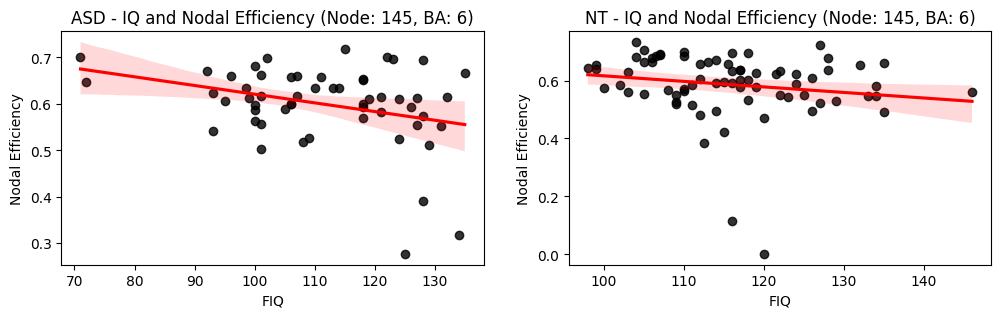

ASD (Residuals): r=-0.326, p=0.015
NT (Residuals): r=-0.015, p=0.899
ASD (P-Corr): p=0.030
NT (P-Corr): p=0.899


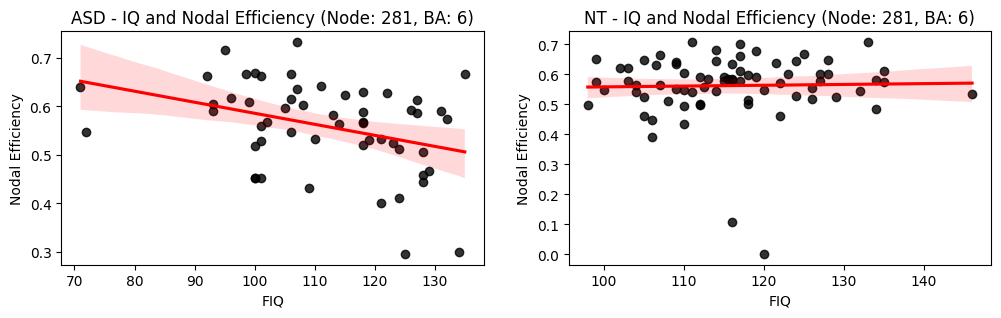

ASD (Residuals): r=-0.303, p=0.025
NT (Residuals): r=-0.078, p=0.508
ASD (P-Corr): p=0.049
NT (P-Corr): p=0.508


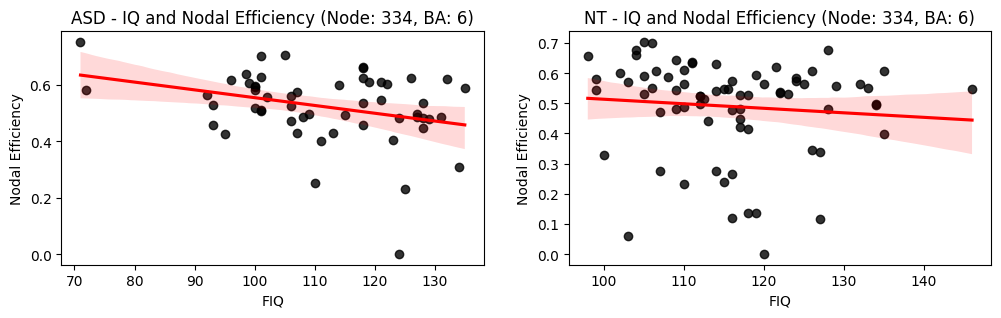

ASD (Residuals): r=-0.324, p=0.016
NT (Residuals): r=-0.063, p=0.592
ASD (P-Corr): p=0.032
NT (P-Corr): p=0.592


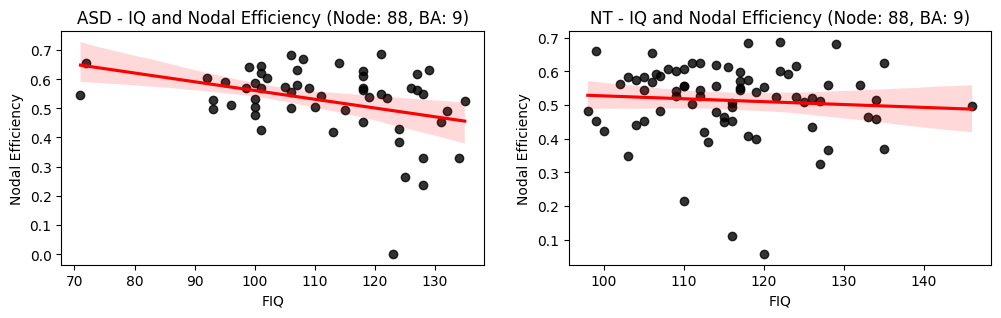

ASD (Residuals): r=-0.321, p=0.017
NT (Residuals): r=0.117, p=0.320
ASD (P-Corr): p=0.034
NT (P-Corr): p=0.320


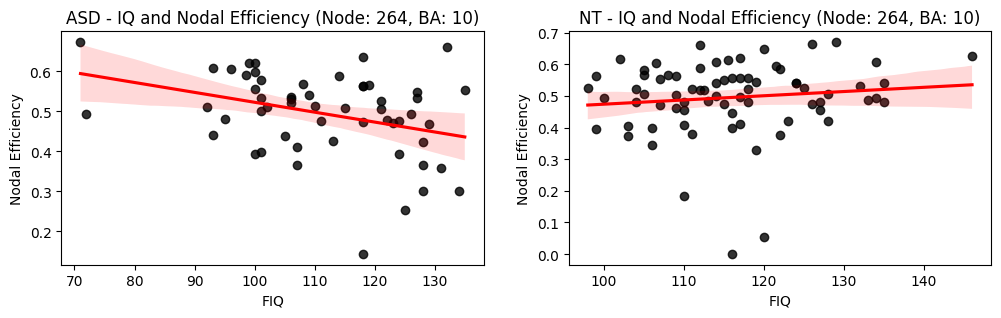

ASD (Residuals): r=-0.366, p=0.006
NT (Residuals): r=-0.082, p=0.490
ASD (P-Corr): p=0.012
NT (P-Corr): p=0.490


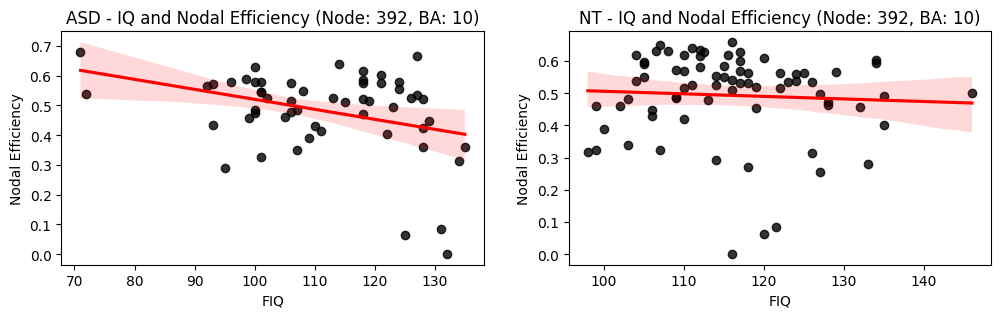

ASD (Residuals): r=-0.345, p=0.010
NT (Residuals): r=-0.028, p=0.813
ASD (P-Corr): p=0.020
NT (P-Corr): p=0.813


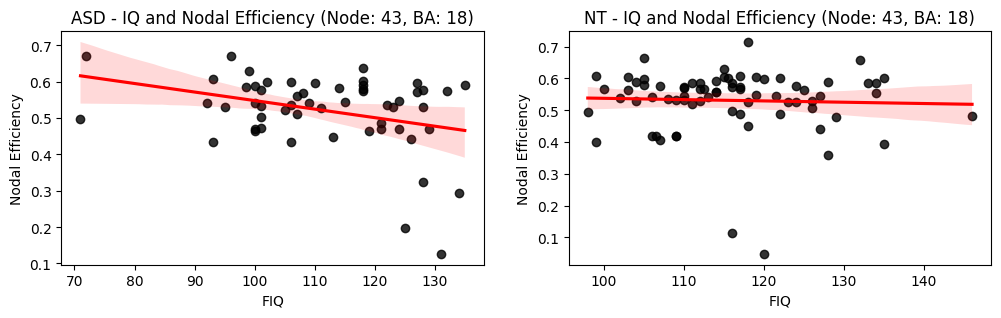

ASD (Residuals): r=-0.383, p=0.004
NT (Residuals): r=-0.034, p=0.775
ASD (P-Corr): p=0.008
NT (P-Corr): p=0.775


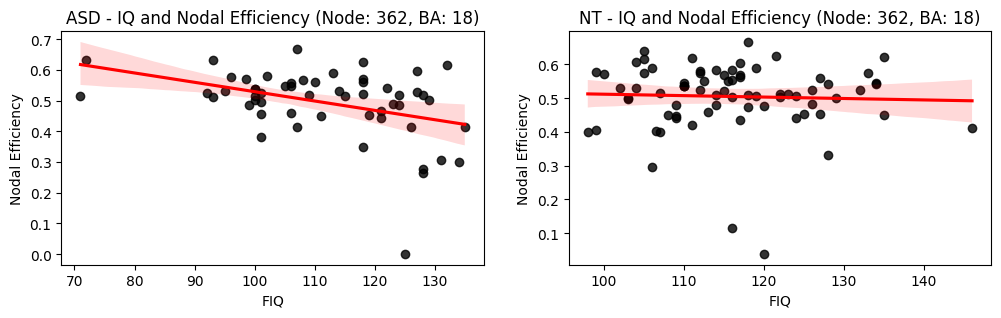

ASD (Residuals): r=-0.348, p=0.009
NT (Residuals): r=0.054, p=0.649
ASD (P-Corr): p=0.018
NT (P-Corr): p=0.649


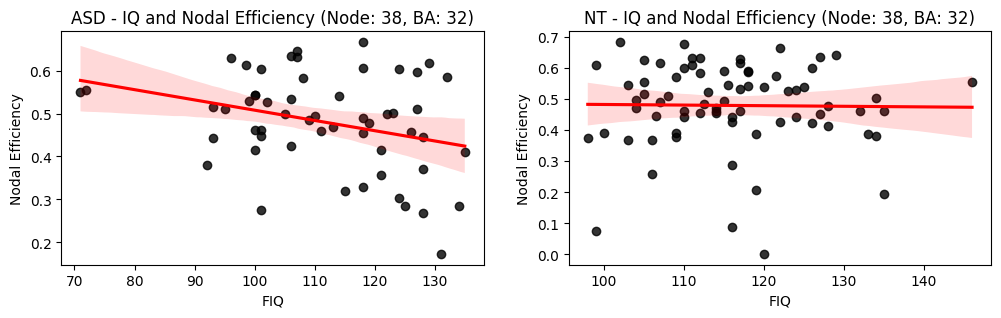

ASD (Residuals): r=-0.356, p=0.008
NT (Residuals): r=0.002, p=0.987
ASD (P-Corr): p=0.015
NT (P-Corr): p=0.987


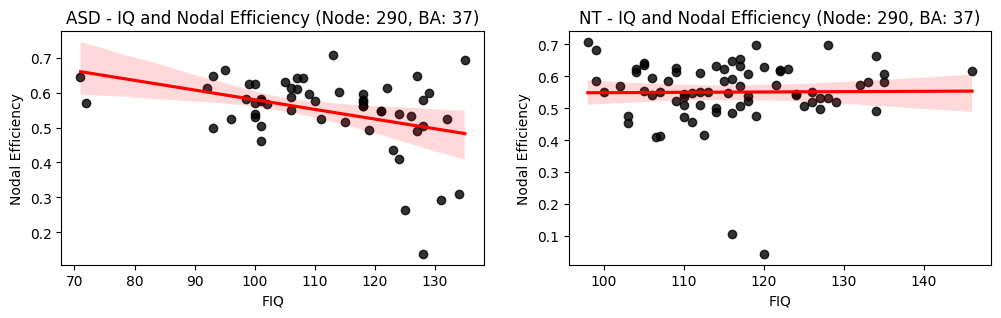

ASD (Residuals): r=-0.305, p=0.024
NT (Residuals): r=-0.088, p=0.456
ASD (P-Corr): p=0.048
NT (P-Corr): p=0.456


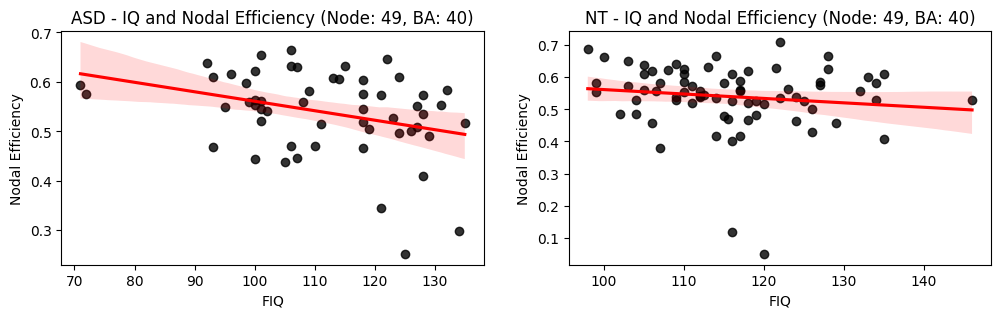

ASD (Residuals): r=-0.330, p=0.014
NT (Residuals): r=-0.028, p=0.815
ASD (P-Corr): p=0.028
NT (P-Corr): p=0.815


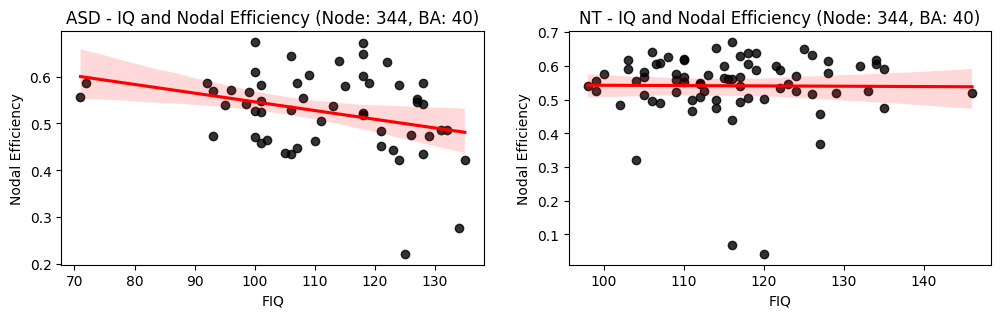

ASD (Residuals): r=-0.330, p=0.014
NT (Residuals): r=0.128, p=0.276
ASD (P-Corr): p=0.028
NT (P-Corr): p=0.276


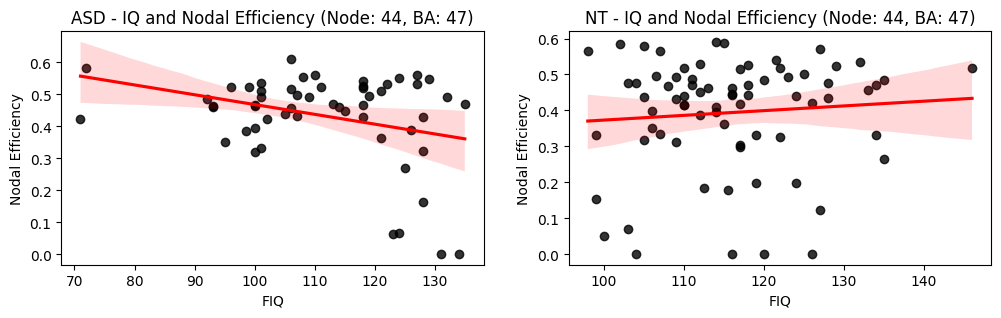

In [22]:
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from matplotlib.gridspec import GridSpec
import scipy
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.multitest import multipletests
# Load all CSV files into one DataFrame


# # ba_nums = [6, 7, 9, 10, 18, 19, 21, 37, 39, 40, 45, 46, 47]
# ba_nums = [21, 39, 47]
# pathToMap = R"C:\GIT\Connectomics\Research_Project\labeled_regions_ba.csv"

# brodmannMapping = FindNodesFromBrodmanns(ba_nums, pathToMap) # Provides a mapping between ba: nodes that overlap

# print(brodmannMapping)

testPath = R"C:\GIT\Connectomics\Research_Project\Binary_Notebooks\Binary_Output\BA\output_ba_6.csv"

masterPath = R"C:\GIT\Connectomics\Research_Project\Binary_Notebooks\master_data_cc400.csv"

master_df = pd.read_csv(masterPath)
all_nodes = master_df['Node ID'].unique()
# print(sorted(all_nodes))
all_nodes = [int(n) for n in all_nodes]
print(sorted(all_nodes))
test_df = pd.read_csv(testPath)


# for ba, nodes in ba_nodes_to_analyze.items():
for ba, nodes in brodmannMapping.items():
    # path = R"C:\GIT\Connectomics\Research_Project\Binary_Notebooks\Binary_Output\BA\output_ba_{}.csv".format(ba)
    # df = pd.read_csv(path)
    master_df.rename(columns={'Nodal Efficiency' : 'Nodal_Efficiency', 'Degree Centrality' : 'Degree_Centrality'}, inplace=True)
    for node in nodes:
        filtered_data = master_df[master_df['Node ID'] == node]
        filtered_data = filtered_data[filtered_data['Age'] >= 18]
        filtered_data = filtered_data[filtered_data['Age'] <= 30]

        filtered_data_ASD = filtered_data[filtered_data['DX_Group'] == 1]
        filtered_data_NT = filtered_data[filtered_data['DX_Group'] == 2]
        

        filtered_data_ASD = pd.get_dummies(filtered_data_ASD, columns=['Handedness'], drop_first=True)
        filtered_data_NT = pd.get_dummies(filtered_data_NT, columns=['Handedness'], drop_first=True)

        from sklearn.linear_model import LinearRegression
        from scipy.stats import pearsonr
        # Function to compute residuals
        def get_residuals(df, y_var, covariates):
            model = LinearRegression()
            X = df[covariates]
            y = df[y_var]
            model.fit(X, y)
            residuals = y - model.predict(X)
            return residuals

        # Define covariates
        covariates_asd = ['Age', 'Sex'] + [col for col in filtered_data_ASD.columns if col.startswith('Handedness_')]
        covariates_nt = ['Age', 'Sex'] + [col for col in filtered_data_NT.columns if col.startswith('Handedness_')]

        # ASD group
        residuals_asd_nodal_eff = get_residuals(filtered_data_ASD, 'Nodal_Efficiency', covariates_asd)
        residuals_asd_iq = get_residuals(filtered_data_ASD, 'IQ', covariates_asd)
        r_asd, p_asd = pearsonr(residuals_asd_iq, residuals_asd_nodal_eff)

        # NT group
        residuals_nt_nodal_eff = get_residuals(filtered_data_NT, 'Nodal_Efficiency', covariates_nt)
        residuals_nt_iq = get_residuals(filtered_data_NT, 'IQ', covariates_nt)
        r_nt, p_nt = pearsonr(residuals_nt_iq, residuals_nt_nodal_eff)

        # Adjust p-values for multiple comparisons
        p_values = [p_asd, p_nt]
        _, corrected_p_values, _, _ = multipletests(p_values, method='fdr_bh')

        p_asd_corrected, p_nt_corrected = corrected_p_values

        # Plots
        # if (abs(r_asd) > 0.3 or abs(r_nt) > 0.3):
        # if p_asd <= 0.05 or p_nt <= 0.05:
        if p_asd_corrected <=0.05:

            fig = plt.figure(figsize=(12, 10))
            gs = GridSpec(2, 2, height_ratios=[1, 2], width_ratios=[1, 1])  # 2 rows, 2 columns, adjust ratios as needed

            # fig, axes = plt.subplots(1, 3, figsize=(12, 6))

            ax1 = fig.add_subplot(gs[0, 0])

            p = sns.regplot(x='IQ', y='Nodal_Efficiency', data=filtered_data_ASD, scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=ax1, fit_reg=True)

            ax1.set_title("ASD - IQ and Nodal Efficiency (Node: {}, BA: {})".format(node, ba))
            ax1.set_xlabel("FIQ")
            ax1.set_ylabel("Nodal Efficiency")
            # plt.show()

            ax2 = fig.add_subplot(gs[0, 1])
            sns.regplot(x='IQ', y='Nodal_Efficiency', data=filtered_data_NT, scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=ax2)
            ax2.set_title("NT - IQ and Nodal Efficiency (Node: {}, BA: {})".format(node, ba))
            ax2.set_xlabel("FIQ")
            ax2.set_ylabel("Nodal Efficiency")

            # Print results
            print(f"ASD (Residuals): r={r_asd:.3f}, p={p_asd:.3f}")
            print(f"NT (Residuals): r={r_nt:.3f}, p={p_nt:.3f}")

            print(f"ASD (P-Corr): p={p_asd_corrected:.3f}")
            print(f"NT (P-Corr): p={p_nt_corrected:.3f}")   

            plt.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224,

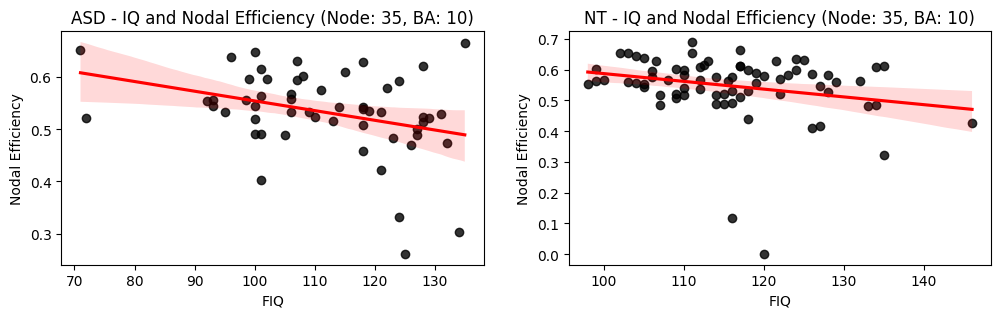

In [44]:
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from matplotlib.gridspec import GridSpec
import scipy
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.multitest import multipletests
# Load all CSV files into one DataFrame


# # ba_nums = [6, 7, 9, 10, 18, 19, 21, 37, 39, 40, 45, 46, 47]
# ba_nums = [21, 39, 47]
# pathToMap = R"C:\GIT\Connectomics\Research_Project\labeled_regions_ba.csv"

# brodmannMapping = FindNodesFromBrodmanns(ba_nums, pathToMap) # Provides a mapping between ba: nodes that overlap

# print(brodmannMapping)

testPath = R"C:\GIT\Connectomics\Research_Project\Binary_Notebooks\Binary_Output\BA\output_ba_6.csv"

masterPath = R"C:\GIT\Connectomics\Research_Project\Binary_Notebooks\master_data_cc400.csv"

master_df = pd.read_csv(masterPath)
all_nodes = master_df['Node ID'].unique()
# print(sorted(all_nodes))
all_nodes = [int(n) for n in all_nodes]
print(sorted(all_nodes))
test_df = pd.read_csv(testPath)

master_df.rename(columns={'Nodal Efficiency' : 'Nodal_Efficiency', 'Degree Centrality' : 'Degree_Centrality'}, inplace=True)
# for ba, nodes in ba_nodes_to_analyze.items():
# for ba, nodes in brodmannMapping.items():
    # path = R"C:\GIT\Connectomics\Research_Project\Binary_Notebooks\Binary_Output\BA\output_ba_{}.csv".format(ba)
    # df = pd.read_csv(path)
ba = 10
for node in all_nodes:
    filtered_data = master_df[master_df['Node ID'] == node]
    filtered_data = filtered_data[filtered_data['Age'] >= 18]
    filtered_data = filtered_data[filtered_data['Age'] <= 30]

    filtered_data_ASD = filtered_data[filtered_data['DX_Group'] == 1]
    filtered_data_NT = filtered_data[filtered_data['DX_Group'] == 2]
    

    filtered_data_ASD = pd.get_dummies(filtered_data_ASD, columns=['Handedness'], drop_first=True)
    filtered_data_NT = pd.get_dummies(filtered_data_NT, columns=['Handedness'], drop_first=True)

    from sklearn.linear_model import LinearRegression
    from scipy.stats import pearsonr
    # Function to compute residuals
    def get_residuals(df, y_var, covariates):
        model = LinearRegression()
        X = df[covariates]
        y = df[y_var]
        model.fit(X, y)
        residuals = y - model.predict(X)
        return residuals

    # Define covariates
    covariates_asd = ['Age', 'Sex'] + [col for col in filtered_data_ASD.columns if col.startswith('Handedness_')]
    covariates_nt = ['Age', 'Sex'] + [col for col in filtered_data_NT.columns if col.startswith('Handedness_')]

    # ASD group
    residuals_asd_nodal_eff = get_residuals(filtered_data_ASD, 'Nodal_Efficiency', covariates_asd)
    residuals_asd_iq = get_residuals(filtered_data_ASD, 'IQ', covariates_asd)
    r_asd, p_asd = pearsonr(residuals_asd_iq, residuals_asd_nodal_eff)

    # NT group
    residuals_nt_nodal_eff = get_residuals(filtered_data_NT, 'Nodal_Efficiency', covariates_nt)
    residuals_nt_iq = get_residuals(filtered_data_NT, 'IQ', covariates_nt)
    r_nt, p_nt = pearsonr(residuals_nt_iq, residuals_nt_nodal_eff)

    # Adjust p-values for multiple comparisons
    p_values = [p_asd, p_nt]
    _, corrected_p_values, _, _ = multipletests(p_values, method='fdr_bh')

    p_asd_corrected, p_nt_corrected = corrected_p_values

    # Plots
    # if (abs(r_asd) > 0.3 or abs(r_nt) > 0.3):
    # if p_asd <= 0.05 or p_nt <= 0.05:
    # if p_asd_corrected <=0.05:
    if p_nt <= 0.05:

        fig = plt.figure(figsize=(12, 10))
        gs = GridSpec(2, 2, height_ratios=[1, 2], width_ratios=[1, 1])  # 2 rows, 2 columns, adjust ratios as needed

        # fig, axes = plt.subplots(1, 3, figsize=(12, 6))

        ax1 = fig.add_subplot(gs[0, 0])

        p = sns.regplot(x='IQ', y='Nodal_Efficiency', data=filtered_data_ASD, scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=ax1, fit_reg=True)

        ax1.set_title("ASD - IQ and Nodal Efficiency (Node: {}, BA: {})".format(node, ba))
        ax1.set_xlabel("FIQ")
        ax1.set_ylabel("Nodal Efficiency")
        # plt.show()

        ax2 = fig.add_subplot(gs[0, 1])
        sns.regplot(x='IQ', y='Nodal_Efficiency', data=filtered_data_NT, scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=ax2)
        ax2.set_title("NT - IQ and Nodal Efficiency (Node: {}, BA: {})".format(node, ba))
        ax2.set_xlabel("FIQ")
        ax2.set_ylabel("Nodal Efficiency")

        # Print results
        print(f"ASD (Residuals): r={r_asd:.3f}, p={p_asd:.3f}")
        print(f"NT (Residuals): r={r_nt:.3f}, p={p_nt:.3f}")

        print(f"ASD (P-Corr): p={p_asd_corrected:.3f}")
        print(f"NT (P-Corr): p={p_nt_corrected:.3f}")   

        plt.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224,

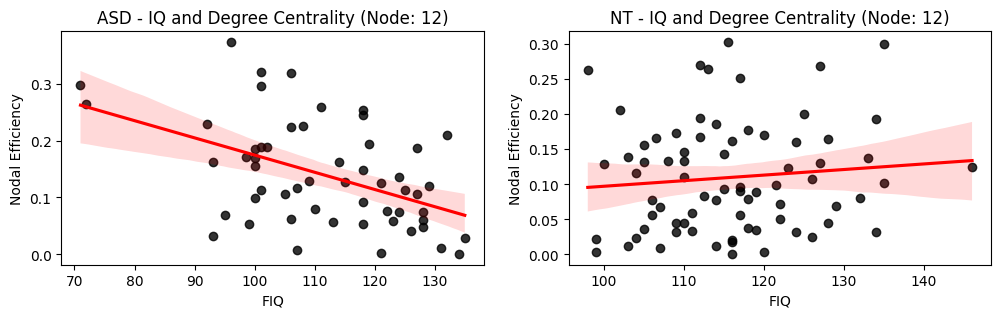

NT Significant
ASD Significant
ASD (Residuals): r=-0.275, p=0.042
NT (Residuals): r=-0.323, p=0.005
ASD (P-Corr): p=0.042
NT (P-Corr): p=0.010
[0.04247621 0.00988117]


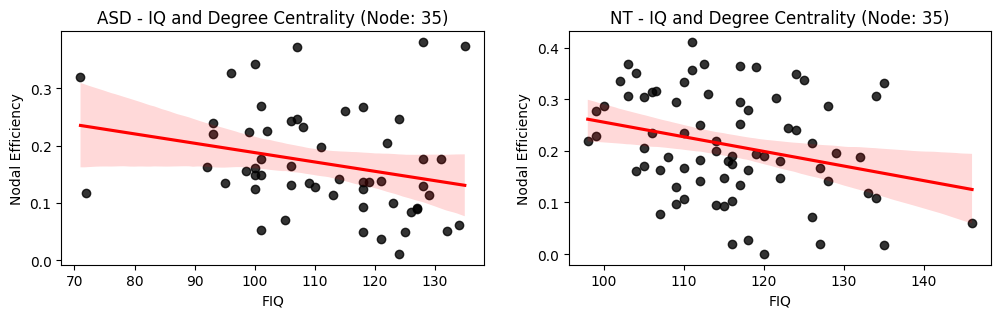

ASD Significant
ASD (Residuals): r=-0.311, p=0.021
NT (Residuals): r=-0.039, p=0.739
ASD (P-Corr): p=0.042
NT (P-Corr): p=0.739
[0.04194164 0.73887472]


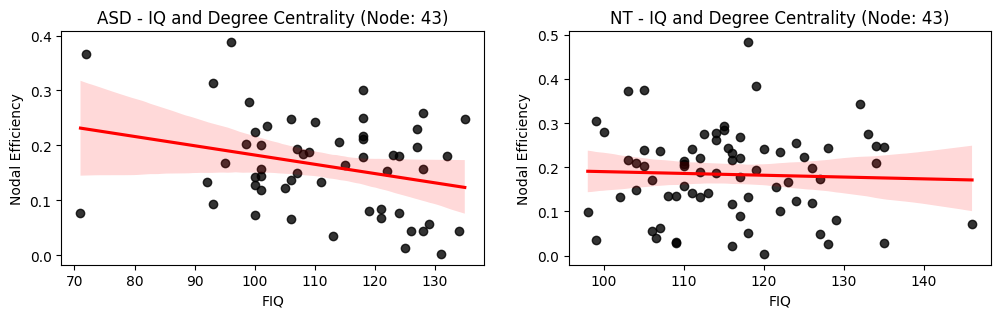

ASD Significant
ASD (Residuals): r=0.366, p=0.006
NT (Residuals): r=0.059, p=0.616
ASD (P-Corr): p=0.012
NT (P-Corr): p=0.616
[0.01206587 0.61588755]


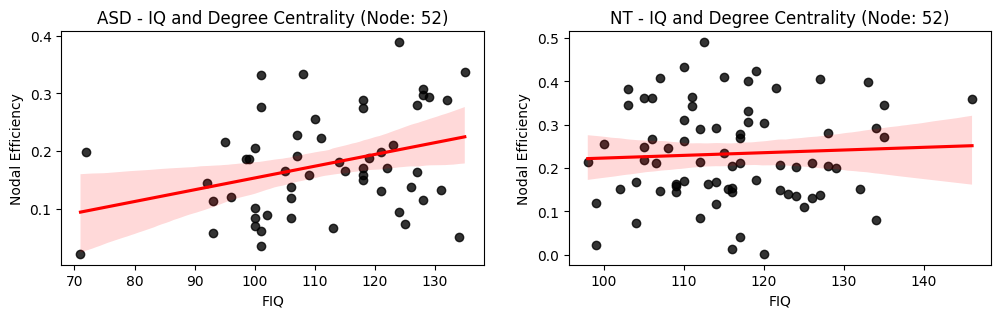

NT Significant
ASD (Residuals): r=0.090, p=0.512
NT (Residuals): r=-0.295, p=0.011
ASD (P-Corr): p=0.512
NT (P-Corr): p=0.021
[0.51242574 0.02147105]


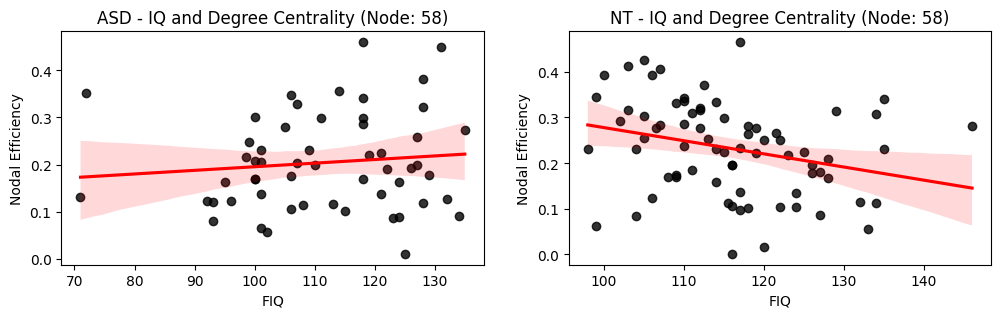

NT Significant
ASD (Residuals): r=-0.061, p=0.659
NT (Residuals): r=-0.274, p=0.018
ASD (P-Corr): p=0.659
NT (P-Corr): p=0.036
[0.65921483 0.03599679]


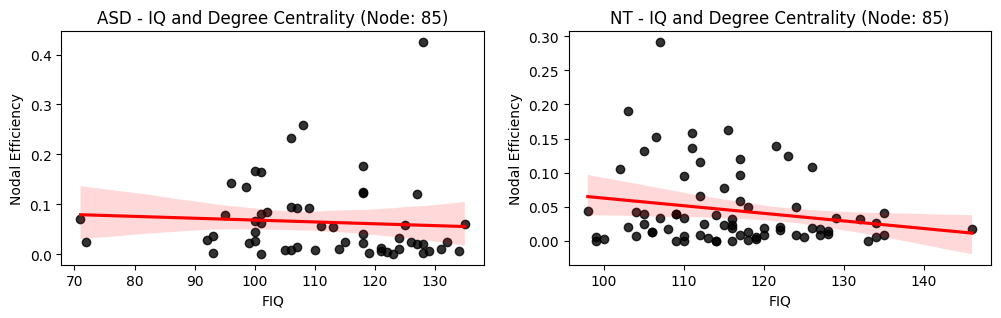

NT Significant
ASD Significant
ASD (Residuals): r=-0.277, p=0.040
NT (Residuals): r=-0.280, p=0.016
ASD (P-Corr): p=0.040
NT (P-Corr): p=0.031
[0.04027694 0.03144329]


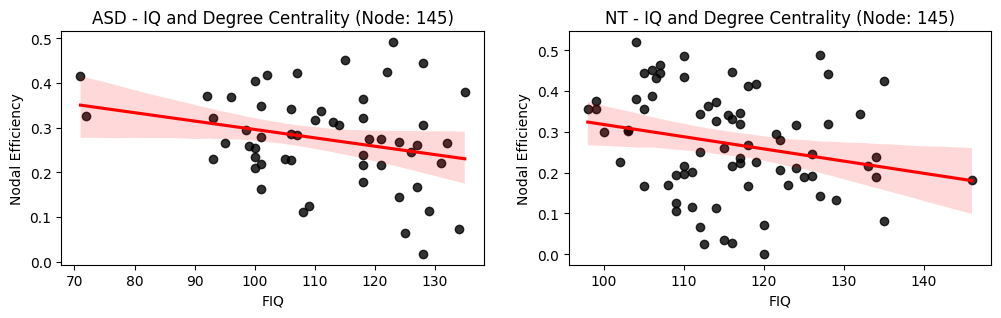

ASD Significant
ASD (Residuals): r=-0.476, p=0.000
NT (Residuals): r=0.074, p=0.529
ASD (P-Corr): p=0.000
NT (P-Corr): p=0.529
[4.82263182e-04 5.28529019e-01]


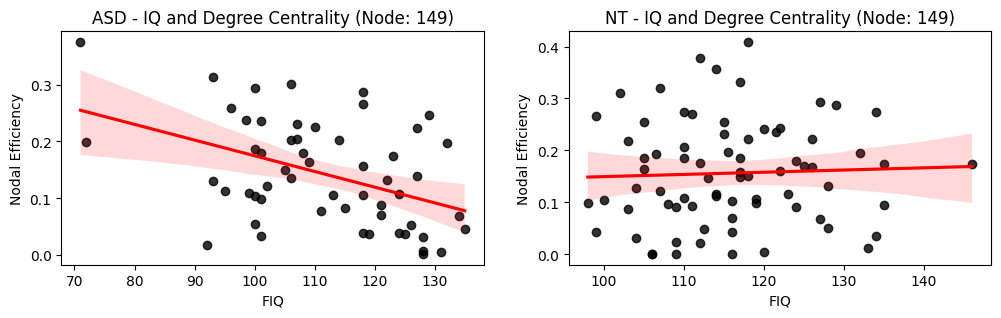

NT Significant
ASD (Residuals): r=0.132, p=0.338
NT (Residuals): r=-0.302, p=0.009
ASD (P-Corr): p=0.338
NT (P-Corr): p=0.018
[0.33827407 0.0176765 ]


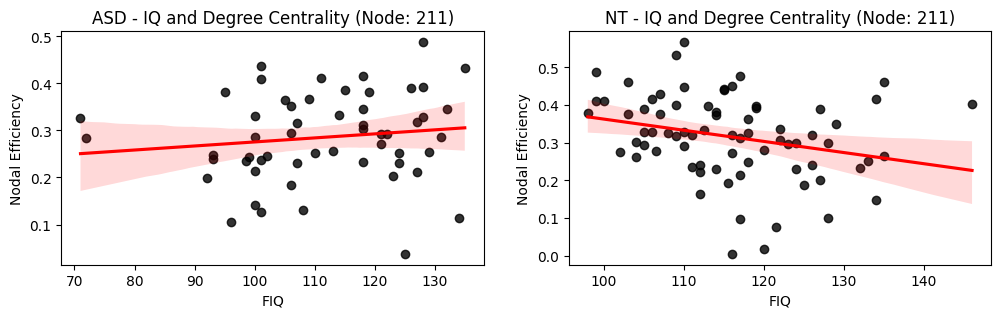

ASD Significant
ASD (Residuals): r=-0.329, p=0.014
NT (Residuals): r=-0.082, p=0.487
ASD (P-Corr): p=0.028
NT (P-Corr): p=0.487
[0.02812636 0.48732674]


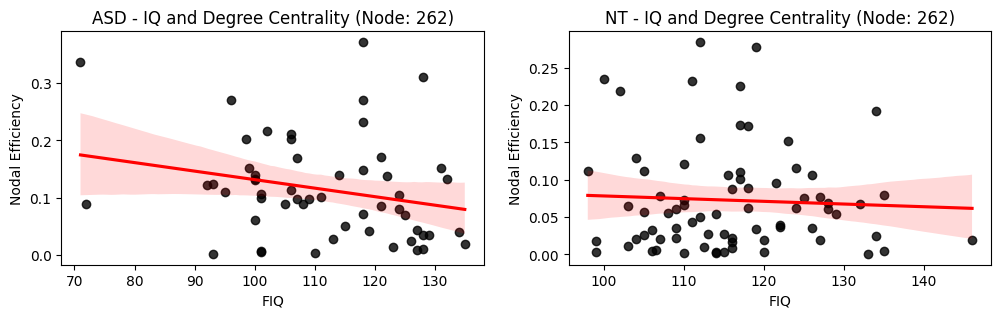

ASD Significant
ASD (Residuals): r=-0.306, p=0.023
NT (Residuals): r=0.197, p=0.092
ASD (P-Corr): p=0.046
NT (P-Corr): p=0.092
[0.04603052 0.09186274]


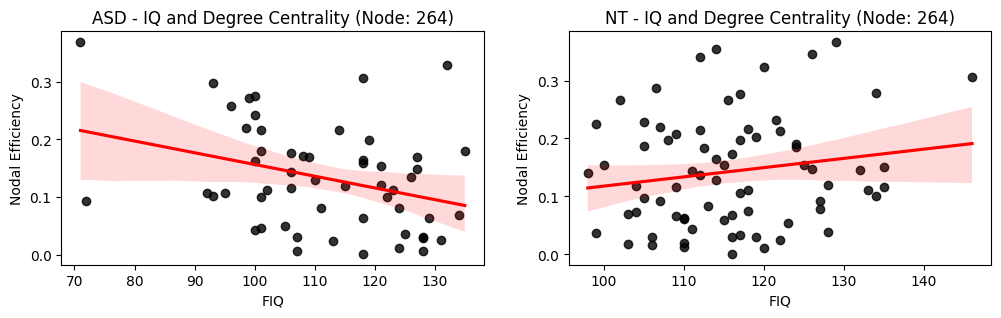

NT Significant
ASD Significant
ASD (Residuals): r=-0.280, p=0.039
NT (Residuals): r=-0.261, p=0.025
ASD (P-Corr): p=0.039
NT (P-Corr): p=0.039
[0.03874276 0.03874276]


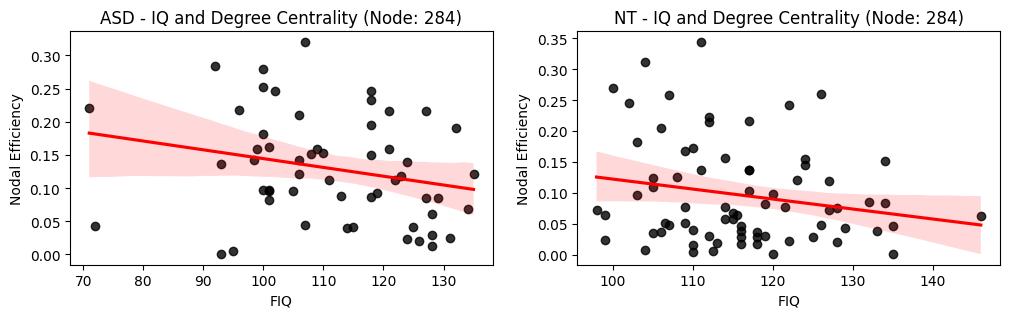

NT Significant
ASD (Residuals): r=-0.097, p=0.480
NT (Residuals): r=-0.287, p=0.013
ASD (P-Corr): p=0.480
NT (P-Corr): p=0.027
[0.47953871 0.02655588]


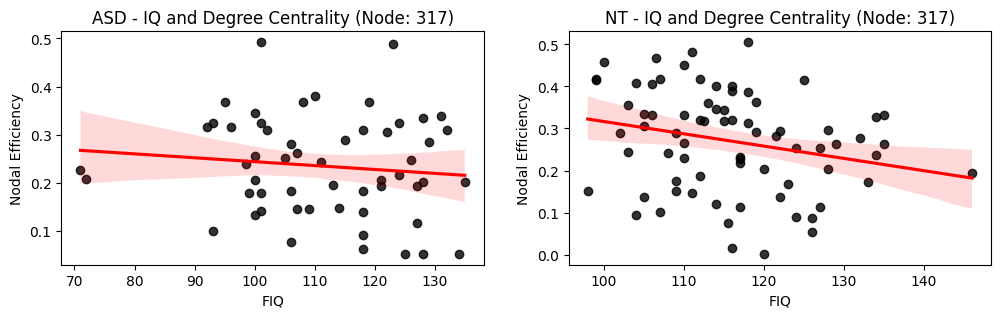

NT Significant
ASD Significant
ASD (Residuals): r=-0.286, p=0.034
NT (Residuals): r=-0.269, p=0.021
ASD (P-Corr): p=0.034
NT (P-Corr): p=0.034
[0.03427054 0.03427054]


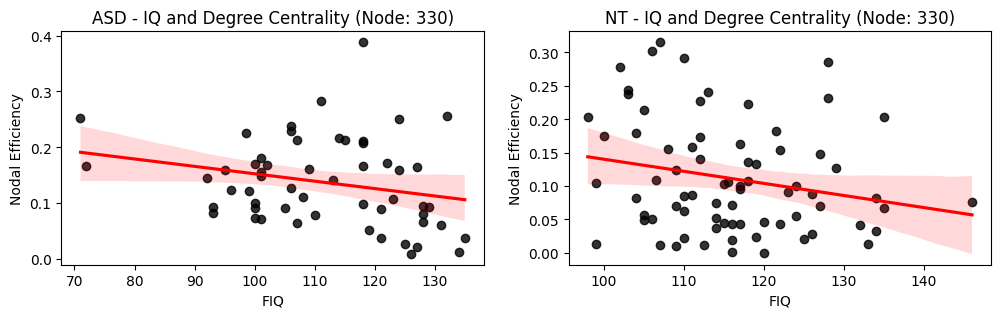

ASD Significant
ASD (Residuals): r=-0.347, p=0.009
NT (Residuals): r=0.096, p=0.418
ASD (P-Corr): p=0.019
NT (P-Corr): p=0.418
[0.01890282 0.41809052]


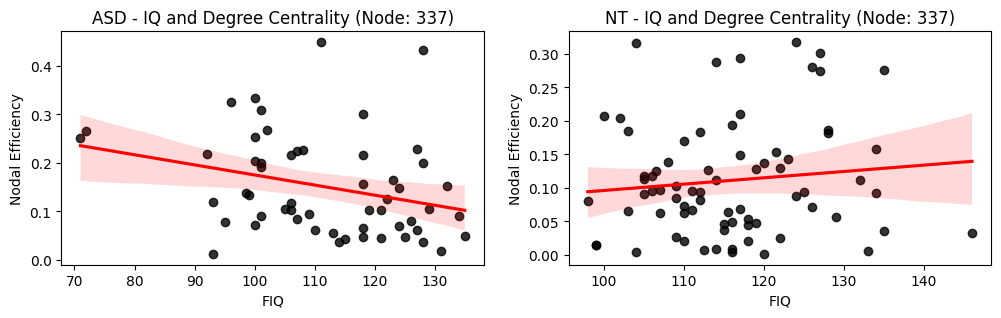

ASD Significant
ASD (Residuals): r=-0.361, p=0.007
NT (Residuals): r=0.031, p=0.792
ASD (P-Corr): p=0.013
NT (P-Corr): p=0.792
[0.01345781 0.79157281]


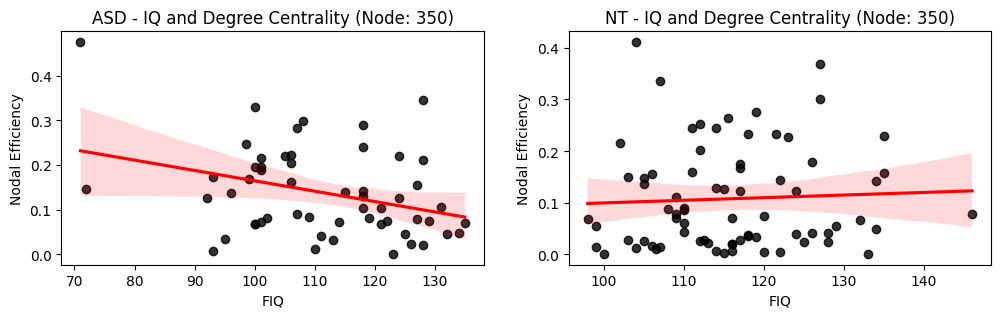

ASD Significant
ASD (Residuals): r=-0.372, p=0.005
NT (Residuals): r=-0.072, p=0.541
ASD (P-Corr): p=0.010
NT (P-Corr): p=0.541
[0.01033478 0.54098454]


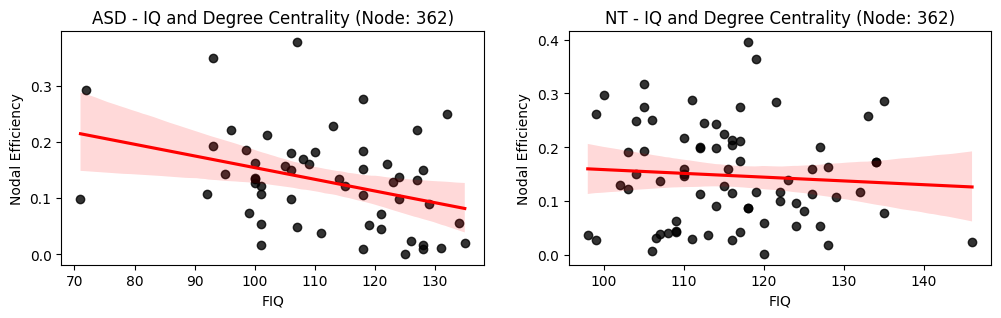

ASD Significant
ASD (Residuals): r=-0.344, p=0.010
NT (Residuals): r=0.068, p=0.564
ASD (P-Corr): p=0.020
NT (P-Corr): p=0.564
[0.0203278  0.56415615]


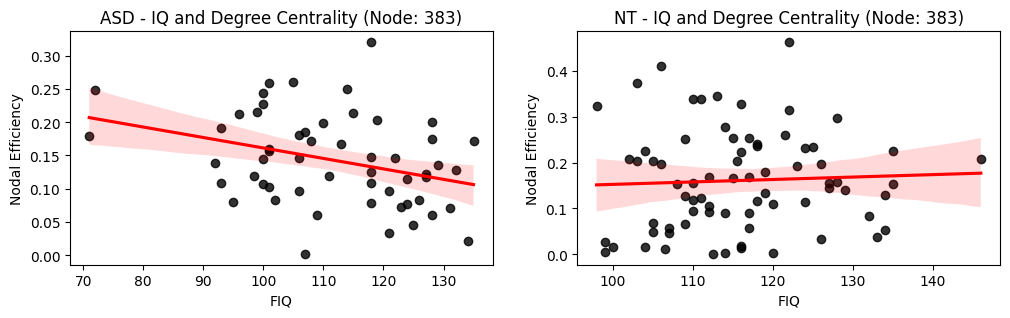

In [46]:
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from matplotlib.gridspec import GridSpec
import scipy
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.multitest import multipletests,  fdrcorrection
# Load all CSV files into one DataFrame


# # ba_nums = [6, 7, 9, 10, 18, 19, 21, 37, 39, 40, 45, 46, 47]
# ba_nums = [21, 39, 47]
# pathToMap = R"C:\GIT\Connectomics\Research_Project\labeled_regions_ba.csv"

# brodmannMapping = FindNodesFromBrodmanns(ba_nums, pathToMap) # Provides a mapping between ba: nodes that overlap

# print(brodmannMapping)

testPath = R"C:\GIT\Connectomics\Research_Project\Binary_Notebooks\Binary_Output\BA\output_ba_6.csv"

masterPath = R"C:\GIT\Connectomics\Research_Project\Binary_Notebooks\master_data_cc400.csv"

master_df = pd.read_csv(masterPath)
all_nodes = master_df['Node ID'].unique()
# print(sorted(all_nodes))
all_nodes = [int(n) for n in all_nodes]
print(sorted(all_nodes))
test_df = pd.read_csv(testPath)

for node in all_nodes:
    master_df.rename(columns={'Nodal Efficiency' : 'Nodal_Efficiency', 'Degree Centrality' : 'Degree_Centrality'}, inplace=True)

    filtered_data = master_df[master_df['Node ID'] == node]
    filtered_data = filtered_data[filtered_data['Age'] >= 18]
    filtered_data = filtered_data[filtered_data['Age'] <= 30]

    filtered_data_ASD = filtered_data[filtered_data['DX_Group'] == 1]
    filtered_data_NT = filtered_data[filtered_data['DX_Group'] == 2]
    

    filtered_data_ASD = pd.get_dummies(filtered_data_ASD, columns=['Handedness'], drop_first=True)
    filtered_data_NT = pd.get_dummies(filtered_data_NT, columns=['Handedness'], drop_first=True)

    from sklearn.linear_model import LinearRegression
    from scipy.stats import pearsonr
    # Function to compute residuals
    def get_residuals(df, y_var, covariates):
        model = LinearRegression()
        X = df[covariates]
        y = df[y_var]
        model.fit(X, y)
        residuals = y - model.predict(X)
        return residuals

    # Define covariates
    covariates_asd = ['Age', 'Sex'] + [col for col in filtered_data_ASD.columns if col.startswith('Handedness_')]
    covariates_nt = ['Age', 'Sex'] + [col for col in filtered_data_NT.columns if col.startswith('Handedness_')]

    # ASD group
    residuals_asd_nodal_eff = get_residuals(filtered_data_ASD, 'Degree_Centrality', covariates_asd)
    residuals_asd_iq = get_residuals(filtered_data_ASD, 'IQ', covariates_asd)
    r_asd, p_asd = pearsonr(residuals_asd_iq, residuals_asd_nodal_eff)

    # NT group
    residuals_nt_nodal_eff = get_residuals(filtered_data_NT, 'Degree_Centrality', covariates_nt)
    residuals_nt_iq = get_residuals(filtered_data_NT, 'IQ', covariates_nt)
    r_nt, p_nt = pearsonr(residuals_nt_iq, residuals_nt_nodal_eff)

    # Adjust p-values for multiple comparisons
    p_values = [p_asd, p_nt]
    _, corrected_p_values, _, _ = multipletests(p_values, method='fdr_bh')

    p_asd_corrected, p_nt_corrected = corrected_p_values
    _, corr_vlas = fdrcorrection(p_values)

    # Plots
    # if (abs(r_asd) > 0.3 or abs(r_nt) > 0.3):
    # if p_asd <= 0.05 or p_nt <= 0.05:
    # if p_asd_corrected <=0.05:
    if p_nt_corrected <= 0.05 or p_asd_corrected <= 0.05:

        if p_nt_corrected <= 0.05:
            print("NT Significant")
        if p_asd_corrected <= 0.05:
            print("ASD Significant")
            
        fig = plt.figure(figsize=(12, 10))
        gs = GridSpec(2, 2, height_ratios=[1, 2], width_ratios=[1, 1])  # 2 rows, 2 columns, adjust ratios as needed

        # fig, axes = plt.subplots(1, 3, figsize=(12, 6))

        ax1 = fig.add_subplot(gs[0, 0])

        p = sns.regplot(x='IQ', y='Degree_Centrality', data=filtered_data_ASD, scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=ax1, fit_reg=True)

        ax1.set_title("ASD - IQ and Degree Centrality (Node: {})".format(node))
        ax1.set_xlabel("FIQ")
        ax1.set_ylabel("Nodal Efficiency")
        # plt.show()

        ax2 = fig.add_subplot(gs[0, 1])
        sns.regplot(x='IQ', y='Degree_Centrality', data=filtered_data_NT, scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=ax2)
        ax2.set_title("NT - IQ and Degree Centrality (Node: {})".format(node))
        ax2.set_xlabel("FIQ")
        ax2.set_ylabel("Nodal Efficiency")

        # Print results
        print(f"ASD (Residuals): r={r_asd:.3f}, p={p_asd:.3f}")
        print(f"NT (Residuals): r={r_nt:.3f}, p={p_nt:.3f}")

        print(f"ASD (P-Corr): p={p_asd_corrected:.3f}")
        print(f"NT (P-Corr): p={p_nt_corrected:.3f}")   
        print(corr_vlas)
        plt.show()